# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observations

- Observations from the Data
    - From the data analysied it can be stated that temperature does increase the closer you get to the equator. However correlations between latitude and other weather factors are all very low. Windspeed, humidity and cloudiness do not have a strong correlation with latitude. This appears true for both the Southern and Northern Hemispheres.
    - In the plot labeled Latitude vs Temperature you can assume that the Northern Hemisphere is in their summer months due to higher temperatures at lower latitudes. Within this same plot a small cluster of data points occur around 40° Latitude and display higher temperatures. This could be further analysed, but a suggestion could be that those cities are being measured at their highest daily temperature ( middle of the afternoon). 
    - There is little data for cities South of -40° Latitude. 
    - Humidity, windspeed and cloudiness appear very comparable from both the Northern and Southern Hemisphere. 

- Considerations
    - The data is collected as current data.  This means time of day plays a large factor and time of year/season plays a large factor, especially when considering and comparing the northern and southern hemispheres. 
     - Plots of Cloudiness vs Latitude suggest cloudiness is unrealated to latitude. Interestingly, it shows that measurements may be taken manual by eye, as they cluster at 20%, 40%, 80% and 100%. 
    - The Northern Hemisphere is more represented in this dataset, however there are more cities in the Northern Hemisphere, so their representation is appropriate. 
    - Plots for Temperateure vs Latitude indicate that temperature decreases away from the equator. Due to Southern Hemisphere latitudes being negative, the linear regression shows a positive correlation ( increasing temp the closer to the equator). The plot for the Northern Hemisphere displays a negative correlation ( decreasing temp away from the equator). 
    

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key= weather_api_key
country=[]
temp=[]
temp_min=[]
temp_max=[]
humidity=[]
cloudiness=[]
windspeed=[]
city_list=[]
long=[]
lat=[]
record=0



base_url = "http://api.openweathermap.org/data/2.5/weather"
#query_url = f"{base_url}?q={city}&units=metric&appid={api_key}"

#query_url =base_url+cityname
#for city in cities:
#response = requests.get(query_url).json()
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        query_url =(f"{base_url}?q={city}&units=metric&appid={api_key}")
        response = requests.get(query_url).json()
        city_list.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        temp_min.append(response["main"]["temp_min"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        
        record=record+1
        
        print(f"Processing Record {record} | {city}")  
        
    
    except:
        print(f"Couldn't find {city}... skipping")
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 | nishihara
Processing Record 2 | rocha
Processing Record 3 | rikitea
Processing Record 4 | ushuaia
Processing Record 5 | codrington
Processing Record 6 | hay river
Processing Record 7 | vrangel
Processing Record 8 | albany
Processing Record 9 | jamestown
Processing Record 10 | vila franca do campo
Processing Record 11 | mataura
Couldn't find taolanaro... skipping
Processing Record 12 | cape town
Processing Record 13 | airai
Processing Record 14 | chimoio
Processing Record 15 | sao felix do xingu
Processing Record 16 | lebu
Processing Record 17 | cesvaine
Processing Record 18 | dikson
Processing Record 19 | geraldton
Processing Record 20 | dubbo
Processing Record 21 | castro
Processing Record 22 | beringovskiy
Couldn't find bokspits... skipping
Processing Record 23 | puerto madryn
Processing Record 24 | bethel
Processing Record 25 | tasiilaq
Processing Record 26 | kargasok
Couldn't find vaitupu... skipping
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
Weather_data={"City": city_list,
              "Latitude": lat,
              "Longitude": long,
              "Country": country, 
              "Temperature (C)": temp, 
              "Humidity (%)": humidity,
              "Cloudiness (%)": cloudiness, 
              "windspeed (m/s)": windspeed}

In [64]:
weather_data_df=pd.DataFrame(Weather_data)
weather_data_df
weather_data_df.to_csv(r'..\output_data\Weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
weather_data_df.describe()

,Latitude,Longitude,Temperature (C),Humidity (%),Cloudiness (%),windspeed (m/s)
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,19.397893,23.213464,20.678107,68.692857,50.901786,3.607179
std,33.762610,88.078318,8.003283,22.121278,39.196847,2.578285
min,-54.800000,-175.200000,-4.220000,8.000000,0.000000,0.050000
25%,-9.055000,-53.392500,15.000000,56.000000,4.000000,1.797500
50%,22.785000,25.660000,21.230000,74.000000,59.500000,3.085000
75%,48.322500,99.470000,26.610000,87.000000,90.000000,4.762500
max,78.220000,179.320000,41.000000,100.000000,100.000000,18.000000


In [66]:
#  Get the indices of cities that have humidity over 100%.
high_humid=weather_data_df.loc[weather_data_df["Humidity (%)"] == 100]

high_humid_list=list(high_humid.index.values)
high_humid_list

[68, 75, 82, 116, 201, 208, 219, 309, 327, 332, 398, 405, 435, 471, 543]

In [67]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
weather_data_df.drop(high_humid_list)
weather_data_df.reindex()
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data_df.to_csv(r'..\output_data\clean_Weather_data.csv', index = False)

In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

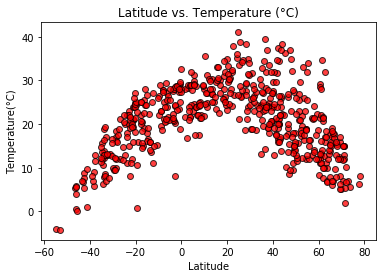

In [37]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature (C)"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature (°C)")
plt.ylabel("Temperature(°C)")
plt.savefig("../Images/LatVsTemp.png")

## Latitude vs. Humidity Plot

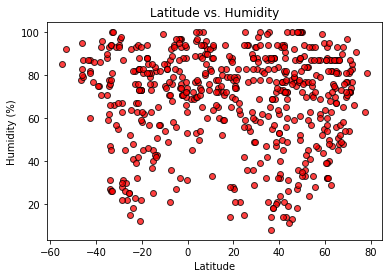

In [38]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity (%)"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatVsHumidpng")

## Latitude vs. Cloudiness Plot

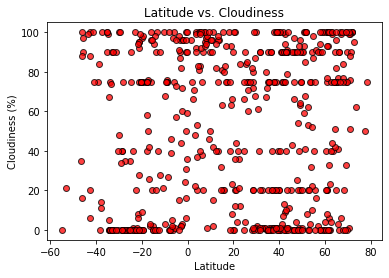

In [39]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness (%)"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatVsCloud.png")

## Latitude vs. Wind Speed Plot

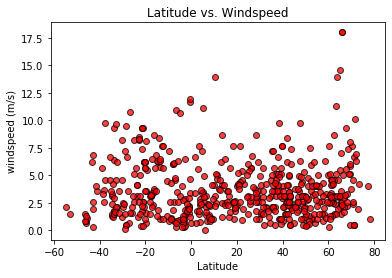

In [36]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["windspeed (m/s)"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Windspeed")
plt.ylabel("windspeed (m/s)")
plt.savefig("../Images/LatVsWS.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [34]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hem_weather = weather_data_df.loc[weather_data_df["Latitude"] > 0]

Southern_Hem_weather= weather_data_df.loc[weather_data_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

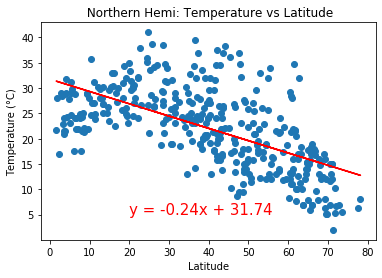

In [40]:
#define x and y axis
Nor_max_temp= Northern_Hem_weather["Temperature (C)"]
Nor_Lat=Northern_Hem_weather["Latitude"]

#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_max_temp)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_max_temp)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.title(" Northern Hemi: Temperature vs Latitude")
plt.savefig("../Images/NH_tempVsLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

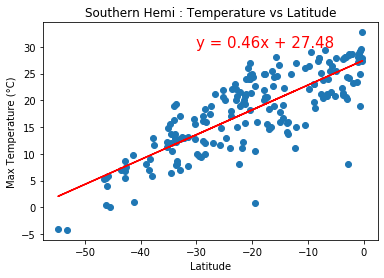

In [46]:
#define x and y axis
Sou_max_temp= Southern_Hem_weather["Temperature (C)"]
Sou_Lat=Southern_Hem_weather["Latitude"]

#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sou_Lat, Sou_max_temp)
regress_values = Sou_Lat * slope + intercept

#plot
plt.scatter(Sou_Lat, Sou_max_temp)

#add lineregression 
plt.plot(Sou_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemi : Temperature vs Latitude")
plt.savefig("../Images/SH_tempVsLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

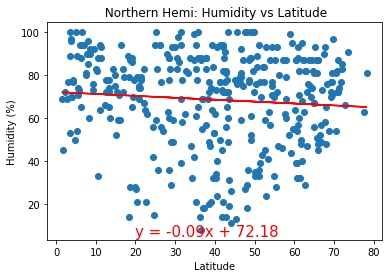

In [42]:
#define x and y axis
Nor_humidity= Northern_Hem_weather["Humidity (%)"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_humidity)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_humidity)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(" Northern Hemi: Humidity vs Latitude")
plt.savefig("../Images/NH_HumidVsLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

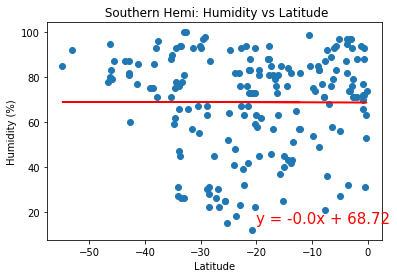

In [51]:
#define x and y axis
Sou_humidity= Southern_Hem_weather["Humidity (%)"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sou_Lat, Sou_humidity)
regress_values = Sou_Lat * slope + intercept

#plot
plt.scatter(Sou_Lat, Sou_humidity)

#add lineregression 
plt.plot(Sou_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(" Southern Hemi: Humidity vs Latitude")
plt.savefig("../Images/SH_HumidVsLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

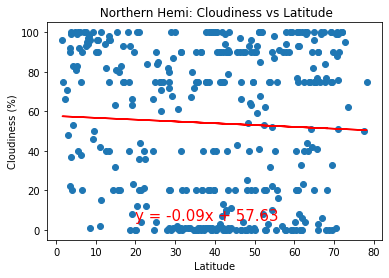

In [52]:
#define x and y axis
Nor_cloud= Northern_Hem_weather["Cloudiness (%)"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_cloud)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_cloud)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(" Northern Hemi: Cloudiness vs Latitude")
plt.savefig("../Images/NH_CloudVsLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

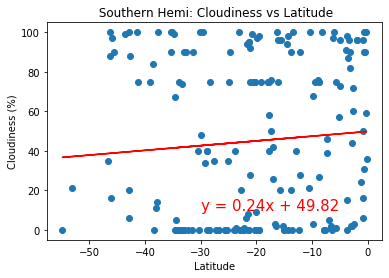

In [57]:
#define x and y axis
Sou_cloud= Southern_Hem_weather["Cloudiness (%)"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sou_Lat, Sou_cloud)
regress_values = Sou_Lat * slope + intercept

#plot
plt.scatter(Sou_Lat, Sou_cloud)

#add lineregression 
plt.plot(Sou_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(" Southern Hemi: Cloudiness vs Latitude")
plt.savefig("../Images/SH_CloudVsLat.png")

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

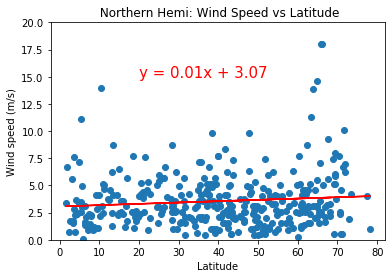

In [58]:
#define x and y axis
Nor_ws= Northern_Hem_weather["windspeed (m/s)"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_ws)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_ws)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.title(" Northern Hemi: Wind Speed vs Latitude")
plt.ylim(0,20)
plt.savefig("../Images/NH_WSVsLat.png")


####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

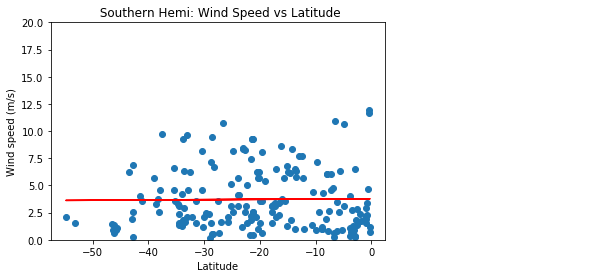

In [59]:
#define x and y axis
Sou_ws= Southern_Hem_weather["windspeed (m/s)"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sou_Lat, Sou_ws)
regress_values = Sou_Lat * slope + intercept

#plot
plt.scatter(Sou_Lat, Sou_ws)

#add lineregression 
plt.plot(Sou_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.title(" Southern Hemi: Wind Speed vs Latitude")
plt.ylim(0,20)
plt.savefig("../Images/SH_WSVsLat.png")